# Legal Text Dataset Analysis

This notebook explores the preprocessed legal text sentiment dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Set style
plt.rcParams['figure.figsize'] = (12, 6)

## Load Datasets

In [2]:
current_dir = Path.cwd()
data_dir = current_dir.parent / 'data'

In [3]:
# Load complete dataset (all data: train + validation + test)
complete_df = pd.read_csv(data_dir / 'complete_sentiments.csv')

print(f"Complete dataset (all data): {len(complete_df)} examples")
print(f"\nDataset info:")
print(complete_df.info())

Complete dataset (all data): 3779 examples

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          3779 non-null   object
 1   text              3779 non-null   object
 2   sentiment_choice  3779 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 88.7+ KB
None


## Class Distribution Analysis

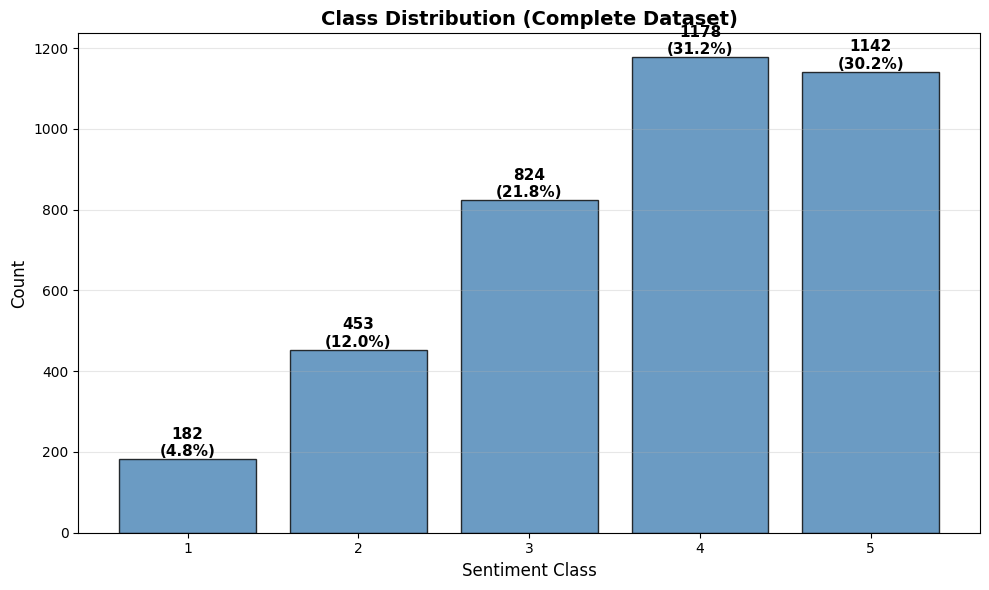


Class distribution:
  Class 1:  182 samples ( 4.82%)
  Class 2:  453 samples (11.99%)
  Class 3:  824 samples (21.80%)
  Class 4: 1178 samples (31.17%)
  Class 5: 1142 samples (30.22%)


In [4]:
# Calculate text length
complete_df['text_length'] = complete_df['text'].str.len()

# Class distribution
fig, ax = plt.subplots(figsize=(10, 6))

counts = complete_df['sentiment_choice'].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color='steelblue', edgecolor='black', alpha=0.8)
ax.set_title('Class Distribution (Complete Dataset)', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add count and percentage labels
for i, (idx, v) in enumerate(counts.items()):
    pct = (v / len(complete_df)) * 100
    ax.text(idx, v, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nClass distribution:")
for label, count in counts.items():
    pct = (count / len(complete_df)) * 100
    print(f"  Class {label}: {count:4d} samples ({pct:5.2f}%)")

## Average Text Length by Class


Text length statistics by class:
                    mean  count  min   max
sentiment_choice                          
1                 782.08    182   17  3921
2                 742.68    453   30  9223
3                 545.29    824   27  7362
4                 404.17   1178   25  3733
5                 223.20   1142    2  4106


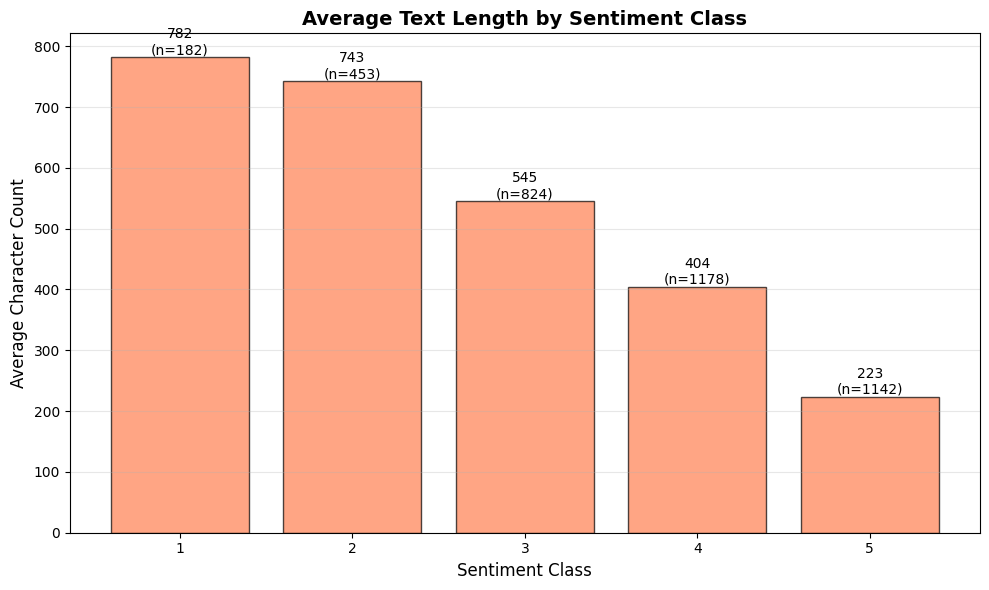

In [5]:
# Calculate average character count per class
avg_length_by_class = complete_df.groupby('sentiment_choice')['text_length'].agg(['mean', 'count', 'min', 'max'])
print("\nText length statistics by class:")
print(avg_length_by_class.round(2))

# Visualize average character count per class
fig, ax = plt.subplots(figsize=(10, 6))

classes = avg_length_by_class.index
means = avg_length_by_class['mean']

bars = ax.bar(classes, means, color='coral', alpha=0.7, edgecolor='black')

ax.set_xlabel('Sentiment Class', fontsize=12)
ax.set_ylabel('Average Character Count', fontsize=12)
ax.set_title('Average Text Length by Sentiment Class', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Set y-axis limits to start from 0
ax.set_ylim(0, None)

# Add value labels on bars
for bar, mean, count in zip(bars, means, avg_length_by_class['count']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.0f}\n(n={count})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Text Length Distribution

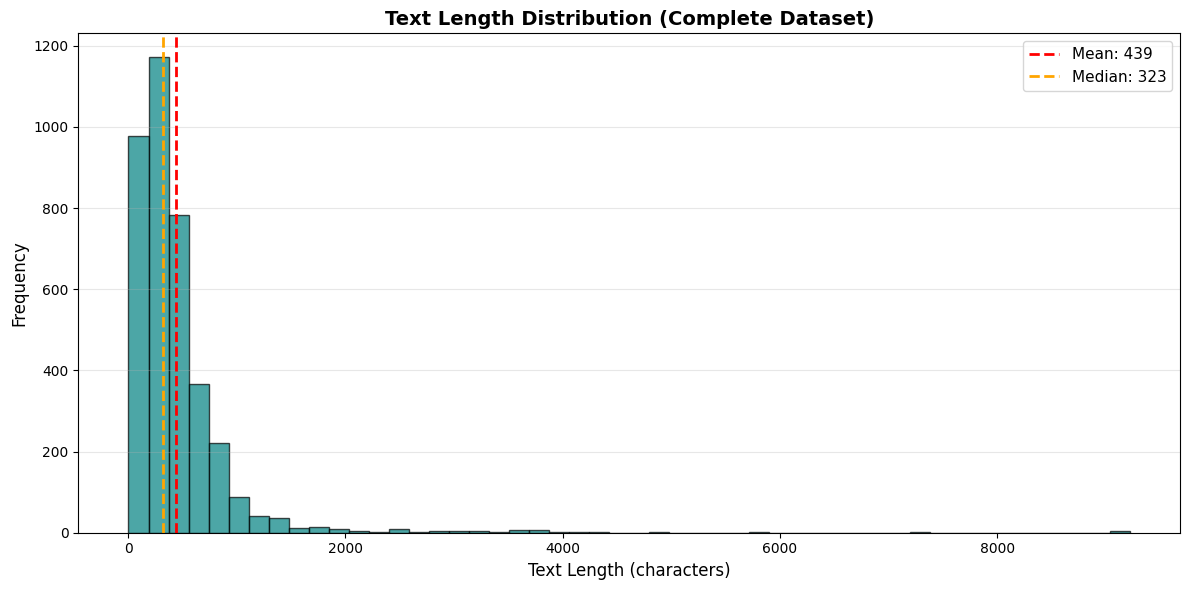


Text Length Statistics (Complete Dataset):
  Mean:   439.03
  Median: 323.00
  Std:    550.32
  Min:    2
  Max:    9223


In [6]:
# Overall text length distribution
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(complete_df['text_length'], bins=50, edgecolor='black', alpha=0.7, color='teal')
ax.set_title('Text Length Distribution (Complete Dataset)', fontsize=14, fontweight='bold')
ax.set_xlabel('Text Length (characters)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.axvline(complete_df['text_length'].mean(), color='red', linestyle='--', 
          linewidth=2, label=f'Mean: {complete_df["text_length"].mean():.0f}')
ax.axvline(complete_df['text_length'].median(), color='orange', linestyle='--', 
          linewidth=2, label=f'Median: {complete_df["text_length"].median():.0f}')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nText Length Statistics (Complete Dataset):")
print(f"  Mean:   {complete_df['text_length'].mean():.2f}")
print(f"  Median: {complete_df['text_length'].median():.2f}")
print(f"  Std:    {complete_df['text_length'].std():.2f}")
print(f"  Min:    {complete_df['text_length'].min()}")
print(f"  Max:    {complete_df['text_length'].max()}")

## Sample Texts by Class

In [7]:
# Show sample texts from each class
for class_label in sorted(complete_df['sentiment_choice'].unique()):
    print(f"\n{'='*70}")
    print(f"CLASS {class_label} EXAMPLES")
    print(f"{'='*70}")
    class_data = complete_df[complete_df['sentiment_choice'] == class_label]
    print(f"Total samples: {len(class_data)}")
    print(f"Average length: {class_data['text_length'].mean():.0f} characters")
    print(f"Length range: {class_data['text_length'].min()} - {class_data['text_length'].max()}")
    
    samples = class_data.sample(min(2, len(class_data)), random_state=42)
    
    for sample_num, (idx, row) in enumerate(samples.iterrows(), 1):
        print(f"\n--- Sample {sample_num} ---")
        print(f"Text: {row['text'][:300]}...")
        print(f"Length: {len(row['text'])} characters")


CLASS 1 EXAMPLES
Total samples: 182
Average length: 782 characters
Length range: 17 - 3921

--- Sample 1 ---
Text: 2. A BKK Zrt. a Felhasználó rendelkezésre bocsátott adatait a természetes személyeknek a személyes adatok kezelése tekintetében történő védelméről és az ilyen adatok szabad áramlásáról, valamint a 95/46/EK rendelet hatályon kívül helyezéséről szóló 2016/679 számú európai parlamenti és tanácsi rendel...
Length: 396 characters

--- Sample 2 ---
Text: 1.7. A jelen ÁSZF értelmezésében és az ÁSZF-ben nem szabályozott kérdésekben a magyar jog az irányadó, különösen a Polgári Törvénykönyvről szóló 2013. évi V. törvény („Ptk.”),az elektronikus kereskedelmi szolgáltatások, az információs társadalommal összefüggő szolgáltatások egyes kérdéseiről szóló 2...
Length: 618 characters

CLASS 2 EXAMPLES
Total samples: 453
Average length: 743 characters
Length range: 30 - 9223

--- Sample 1 ---
Text: 7. A finanszírozási szerződés tárgya a Finanszírozó és a Szolgáltató által aláírt finanszí

## Dataset Balance Analysis

Imbalance Ratio (max_class / min_class): 6.47
Interpretation: The most frequent class has 6.47x more samples than the least frequent class

Dataset has significant imbalance - class weights or resampling recommended


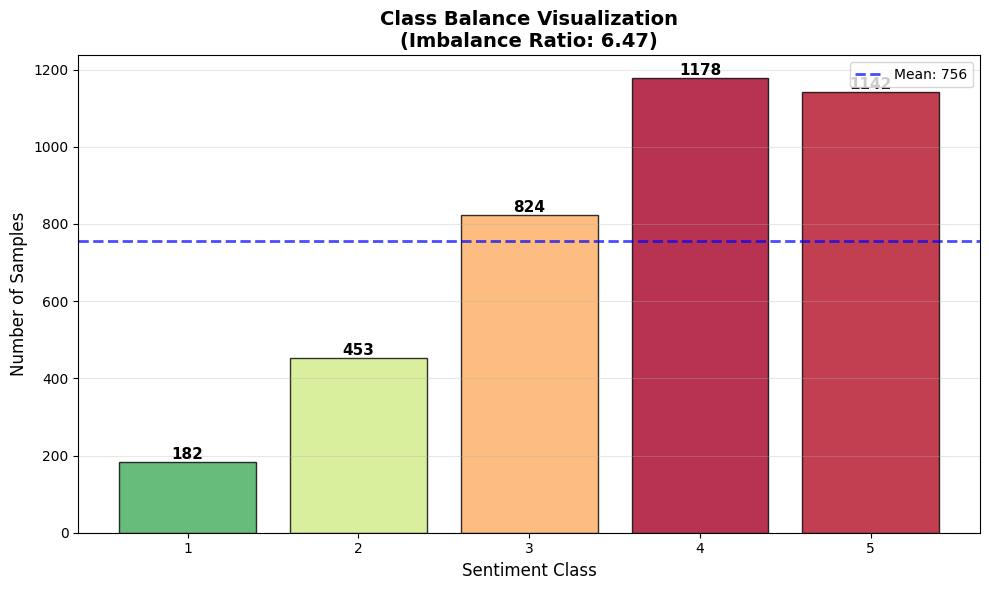

In [8]:
# Calculate imbalance ratio
def calculate_imbalance(df):
    counts = df['sentiment_choice'].value_counts()
    max_count = counts.max()
    min_count = counts.min()
    return max_count / min_count

imbalance_ratio = calculate_imbalance(complete_df)
print(f"Imbalance Ratio (max_class / min_class): {imbalance_ratio:.2f}")
print(f"Interpretation: The most frequent class has {imbalance_ratio:.2f}x more samples than the least frequent class\n")

if imbalance_ratio < 1.5:
    print("Dataset is well balanced")
elif imbalance_ratio < 3.0:
    print("Dataset has moderate imbalance - consider class weights")
else:
    print("Dataset has significant imbalance - class weights or resampling recommended")

# Improved balance visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Get class counts for a better visualization
class_counts = complete_df['sentiment_choice'].value_counts().sort_index()

# Create gradient colors based on count
colors = plt.cm.RdYlGn_r(class_counts / class_counts.max())

bars = ax.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Sentiment Class', fontsize=12)
ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title(f'Class Balance Visualization\n(Imbalance Ratio: {imbalance_ratio:.2f})', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add horizontal line for mean
mean_count = class_counts.mean()
ax.axhline(y=mean_count, color='blue', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Mean: {mean_count:.0f}')

# Add value labels on bars
for bar, count in zip(bars, class_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.legend()
plt.tight_layout()
plt.show()